# <p><span style="color:darkblue">Neural Style Transfer</span></p>

## Import libraries

In [1]:
import torch
from torch import nn
from torchvision import models
from matplotlib import pyplot as plt

from model import Compiler
from trainer import Trainer
from utils import ImageLoader, ImageShow

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
vgg19 = models.vgg19(pretrained=True).features.eval()

contentLayerNames = ['conv4']
styleLayerNames = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5']

## Experiment 1

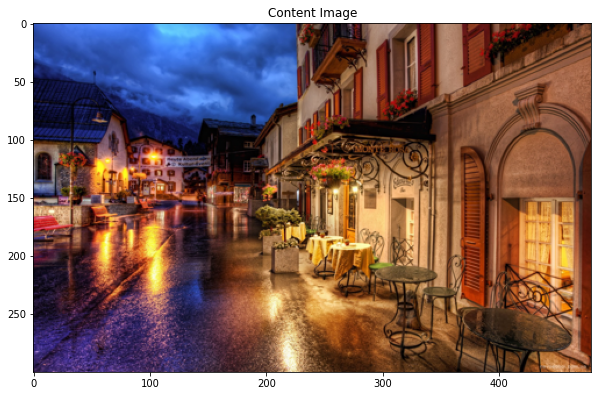

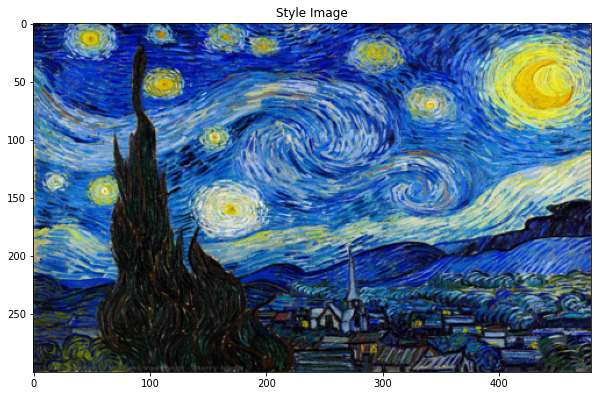

In [3]:
contentImage = ImageLoader("images/rome.jpg")
styleImage = ImageLoader("images/starry_night.jfif")

ImageShow(contentImage, title='Content Image')
ImageShow(styleImage, title='Style Image')

## Compile

In [4]:
compiler = Compiler(vgg19, contentLayerNames, styleLayerNames, device)
model, contentLayers, styleLayers = compiler.compile(contentImage, styleImage, device)

## Train

In [5]:
trainer = Trainer(model, contentLayers, styleLayers, device)

inputImage = contentImage.clone()
losses, outImage = trainer.fit(inputImage)

Epoch 1/10 --- Total Loss: 1602.0732 
Content Loss: 29.602362 --- Style Loss : 1572.470879
---------------------------------------------------
Epoch 2/10 --- Total Loss: 401.9927 
Content Loss: 33.565208 --- Style Loss : 368.427514
---------------------------------------------------
Epoch 3/10 --- Total Loss: 189.0034 
Content Loss: 35.260891 --- Style Loss : 153.742527
---------------------------------------------------
Epoch 4/10 --- Total Loss: 103.1848 
Content Loss: 35.896015 --- Style Loss : 67.288798
---------------------------------------------------
Epoch 5/10 --- Total Loss: 68.9809 
Content Loss: 34.386848 --- Style Loss : 34.594064
---------------------------------------------------
Epoch 6/10 --- Total Loss: 50.3757 
Content Loss: 31.800257 --- Style Loss : 18.575432
---------------------------------------------------
Epoch 7/10 --- Total Loss: 41.6500 
Content Loss: 28.983664 --- Style Loss : 12.666374
---------------------------------------------------
Epoch 8/10 --- Tot

## Results

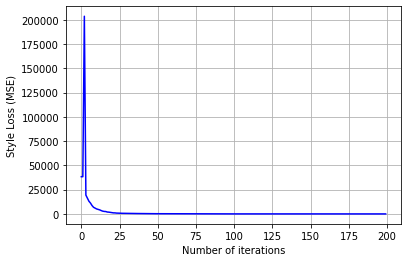

In [6]:
tloss = losses['total']
closs = losses['content']
sloss = losses['style']

plt.plot(sloss, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Style Loss (MSE)')
plt.grid()

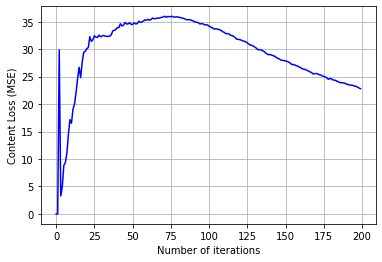

In [7]:
plt.plot(closs, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Content Loss (MSE)')
plt.grid()

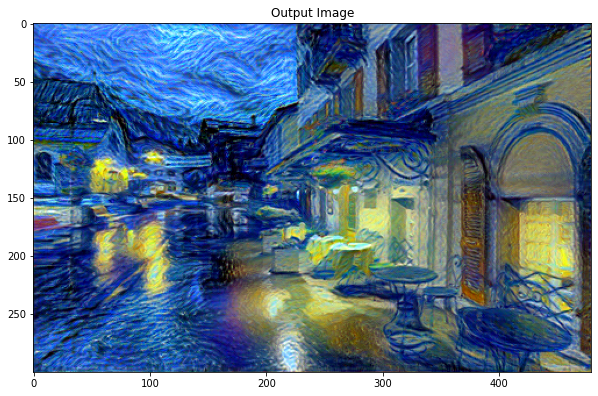

In [8]:
ImageShow(outImage, title='Output Image')

## Experiment 2

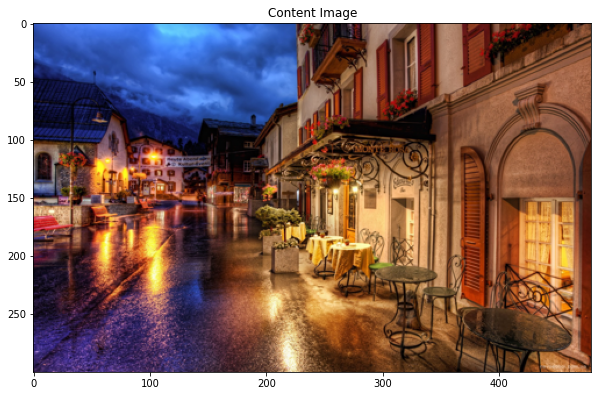

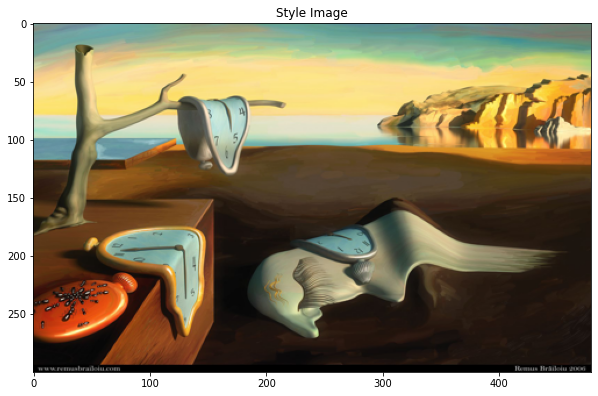

In [9]:
contentImage = ImageLoader("images/rome.jpg")
styleImage = ImageLoader("images/dali.jpg")

ImageShow(contentImage, title='Content Image')
ImageShow(styleImage, title='Style Image')

## Compile model

In [10]:
compiler = Compiler(vgg19, contentLayerNames, styleLayerNames, device)
model, contentLayers, styleLayers = compiler.compile(contentImage, styleImage, device)

## Train

In [11]:
trainer = Trainer(model, contentLayers, styleLayers, device)

inputImage = contentImage.clone()
losses, outImage = trainer.fit(inputImage)

Epoch 1/10 --- Total Loss: 296.2391 
Content Loss: 17.852938 --- Style Loss : 278.386171
---------------------------------------------------
Epoch 2/10 --- Total Loss: 97.0628 
Content Loss: 20.022417 --- Style Loss : 77.040429
---------------------------------------------------
Epoch 3/10 --- Total Loss: 74.0061 
Content Loss: 19.601246 --- Style Loss : 54.404816
---------------------------------------------------
Epoch 4/10 --- Total Loss: 57.5669 
Content Loss: 19.598795 --- Style Loss : 37.968079
---------------------------------------------------
Epoch 5/10 --- Total Loss: 50.1507 
Content Loss: 19.131823 --- Style Loss : 31.018859
---------------------------------------------------
Epoch 6/10 --- Total Loss: 48.0121 
Content Loss: 18.465631 --- Style Loss : 29.546498
---------------------------------------------------
Epoch 7/10 --- Total Loss: 40.1929 
Content Loss: 18.299553 --- Style Loss : 21.893362
---------------------------------------------------
Epoch 8/10 --- Total Loss

## Results

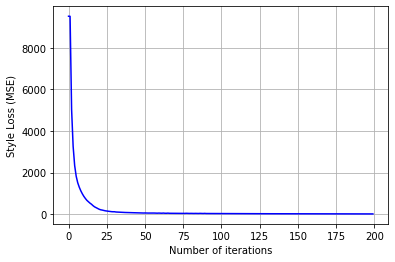

In [12]:
tloss = losses['total']
closs = losses['content']
sloss = losses['style']

plt.plot(sloss, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Style Loss (MSE)')
plt.grid()

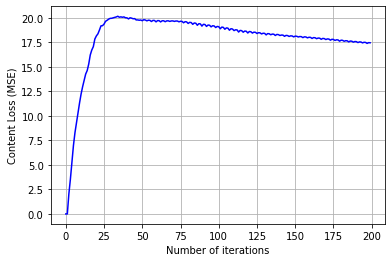

In [13]:
plt.plot(closs, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Content Loss (MSE)')
plt.grid()

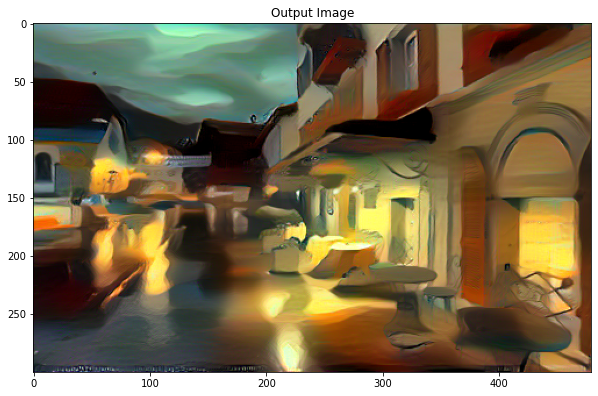

In [14]:
ImageShow(outImage, title='Output Image')